# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

In [ ]:
# Write your answer here and turn the cell type into markdown

### 2. Formulate the business problem, success metrics, and desired ML output.

In [ ]:
# Write your answer here and turn the cell type into markdown

### 3. Identify the type of ML problem you’re dealing with.

In [ ]:
# Write your answer here and turn the cell type into markdown

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [ ]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [ ]:
# <note: make them all relative, absolute path is not accepted>
zip_path = "data" # 'path to the zip files'
base_path = "." # 'the folder that contains the whole project (data and code)'
csv_base_path = "csv_data" #'path to where you want the zip files extracted'
!mkdir {csv_base_path}

In [ ]:
# # download the files

# # <note: make them all relative, absolute path is not accepted>
# zip_path = 'path to the zip files'
# base_path = 'the folder that contains the whole project (data and code)'
# csv_base_path = 'path to where you want the zip files extracted'

# !mkdir -p {csv_base_path}

In [ ]:
import os

zip_files = []

for f in os.listdir(zip_path):
    if f.endswith('.zip'):
        file_path = os.path.join(zip_path, f)
        zip_files.append(f)  # Append just the filename to the list

# Print the number of zip files and the list of zip file names
print(f"Number of .zip files: {len(zip_files)}")

In [ ]:
# How many zip files do we have? write a code to answer it.


#### Extract CSV files from ZIP files

In [ ]:
import os
from zipfile import ZipFile

def zip2csv(zipFile_name, file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """
    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except Exception as e:
        print(f'zip2csv failed for {zipFile_name}: {e}')


# Get a list of zip files in the zip_path directory
zip_files = [os.path.join(zip_path, f) for f in os.listdir(zip_path) if f.endswith('.zip')]

# Extract each zip file
for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

In [ ]:
# How many csv files have we extracted? write a code to answer it. 

In [ ]:
import os
import glob

csv_base_path = "csv_data"  # Replace with the actual path where CSV files are extracted
csv_files = glob.glob(os.path.join(csv_base_path, '*.csv'))
print(f"Number of CSV files extracted: {len(csv_files)}")

Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [ ]:
csv_base_path = 'csv_data'
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

In [ ]:
# from IPython.display import IFrame

# IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [ ]:
df_temp = pd.read_csv("csv_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")

In [ ]:
df_temp = pd.read_csv(<CODE> # **ENTER YOUR CODE HERE**

**Question**: Print the row and column length in the dataset, and print the column names.

In [ ]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

In [ ]:
df_shape = # **ENTER YOUR CODE HERE**
print(f'Rows and columns in one csv file is {df_shape}')

**Question**: Print the first 10 rows of the dataset.  

In [ ]:
df_temp.head(10)

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [ ]:
print(f'The column names are :')
print('#########')
for col in <CODE>:# **ENTER YOUR CODE HERE**
    print(col)

In [ ]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [ ]:
print(f'Column names containing "Del":')
print('#########')
del_columns = [col for col in df_temp.columns if 'Del' in col]
for col in del_columns:
    print(col)

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [ ]:
import pandas as pd
df = df_temp
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame

# How many rows and columns does the dataset have?
num_rows, num_columns = df.shape
print("The number of rows and columns are", num_rows, "and", num_columns)

# How many years are included in the dataset?
years_in_dataset = df['Year'].unique()
print("The years in this dataset are:", list(years_in_dataset))

# What is the date range for the dataset?
date_range = df['FlightDate']
print("The date range for data is:", date_range.min(), "to", date_range.max())

# Which airlines are included in the dataset?
airlines_included = df['Reporting_Airline'].unique()
print("The airlines covered in this dataset are:", list(airlines_included))

# Which origin and destination airports are covered?
origin_airports = df['Origin'].unique()
destination_airports = df['Dest'].unique()
print("The Origin airports covered are:", list(origin_airports))
print("The Destination airports covered are:", list(destination_airports))


In [ ]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", <CODE> , " and ", <CODE>)
print("The years in this dataset are: ", <CODE>)
print("The months covered in this dataset are: ", <CODE>)
print("The date range for data is :" , min(<CODE>), " to ", max(<CODE>))
print("The airlines covered in this dataset are: ", list(<CODE>))
print("The Origin airports covered are: ", list(<CODE>))
print("The Destination airports covered are: ", list(<CODE>))

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [ ]:
import pandas as pd

# Create a DataFrame from the counts
counts = pd.DataFrame({'Origin': df['Origin'].value_counts(), 'Destination': df['Dest'].value_counts()})

# Display the counts
counts

In [ ]:
counts = pd.DataFrame({'Origin':<CODE>, 'Destination':<CODE>})
counts

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [ ]:
# Sort the counts DataFrame by a specific column and display the top 15
sorted_counts = counts.sort_values(by='Origin', ascending=False).head(15)
print(sorted_counts)

In [ ]:
counts.sort_values(by=<CODE>,ascending=False).head(15 )# Enter your code here

**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

In [ ]:
# Enter your answer here

# No Still difficult to explain

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [ ]:
import pandas as pd

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals):
    """
    Combine csv files into one DataFrame.
    
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    combined_df = pd.DataFrame()
    
    # Loop through each csv file
    for file in csv_files:
        # Read the CSV file into a dataframe
        df = pd.read_csv(file)

        # Filter the columns based on filter_cols
        df_filtered = df[filter_cols]
        
        # Keep only the subset_vals in each of the subset_cols
        for col, vals in zip(subset_cols, subset_vals):
            df_filtered = df_filtered[df_filtered[col].isin(vals)]

        # Concatenate the dataframe with the combined dataframe
        combined_df = pd.concat([combined_df, df_filtered], ignore_index=True)

    return combined_df


In [ ]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = # Enter your code here 
    
    #<complete the code of this function>

In [ ]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [ ]:
import time
import os
import glob

# Assuming csv_base_path contains paths to the CSV files
csv_base_path = "csv_data"  # Replace with the actual path where CSV files are extracted
csv_files = glob.glob(os.path.join(csv_base_path, '*.csv'))

# Define the output combined CSV filename
base_path = "."  # Replace with your actual base path
combined_csv_filename = os.path.join(base_path, "combined_files.csv")

# Start the timer
start = time.time()

# Call the combine_csv function
combined_df = combine_csv(csv_files, cols, subset_cols, subset_vals)

# Save the combined DataFrame to CSV
combined_df.to_csv(combined_csv_filename, index=False)

# Calculate the time taken and print it
print(f"CSVs merged in {round((time.time() - start)/60, 2)} minutes")

In [ ]:
start = time.time()

combined_csv_filename = f"{base_path}combined_files.csv"

# < write code to call the combined_csv function>

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

#### Load dataset

Load the combined dataset.

In [ ]:
import pandas as pd
data = pd.read_csv("combined_files.csv")# Enter your code here to read the combined csv file.

In [ ]:
# data = pd.read_csv(<CODE>)# Enter your code here to read the combined csv file.

Print the first 5 records.

In [ ]:
data.info()

In [ ]:
# Enter your code here 

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [ ]:
df = data
print("The #rows and #columns are ", df.shape[0], " and ", df.shape[1])
print("The years in this dataset are: ", list(df['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(df['Month'].unique())))
print("The date range for data is :" , min(df['FlightDate']), " to ", max(df['FlightDate']))
print("The airlines covered in this dataset are: ", list(df['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(df['Origin'].unique()))
print("The Destination airports covered are: ", list(df['Dest'].unique()))

In [ ]:
# # to answer above questions, complete the following code
# print("The #rows and #columns are ", <CODE> , " and ", <CODE>)
# print("The years in this dataset are: ", list(<CODE>))
# print("The months covered in this dataset are: ", sorted(list(<CODE>)))
# print("The date range for data is :" , min(<CODE>), " to ", max(<CODE>))
# print("The airlines covered in this dataset are: ", list(<CODE>))
# print("The Origin airports covered are: ", list(<CODE>))
# print("The Destination airports covered are: ", list(<CODE>))

Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [ ]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

In [ ]:
#data.rename(columns=<CODE>, inplace=True) # Enter your code here


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

In [ ]:
len(null_counts)

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [ ]:
for column in ['ArrDelay', 'ArrDelayMinutes', 'AirTime']:
    median_value = df[column].median()
    data[column].fillna(median_value, inplace=True)

# Since is_delay depends on ArrDelayMinutes, we should update it accordingly
data['is_delay'] = (data['ArrDelayMinutes'] > 15).astype(int)

In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

In [ ]:
len(null_counts)

In [ ]:
### Remove null columns
data = data # Enter your code here

Get the hour of the day in 24-hour time format from CRSDepTime.

In [ ]:
data['DepHourofDay'] = data['CRSDepTime'].astype(str).str.zfill(4).str[:2].astype(int)
data['DepHourofDay']

In [ ]:
#data['DepHourofDay'] = # Enter your code here

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

In [ ]:
from matplotlib import pyplot as plt
(data.groupby('is_delay').size()/len(data)).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

In [ ]:
# (data.groupby(<CODE>).size()/len(data) ).plot(kind='bar')# Enter your code here
# plt.ylabel('Frequency')
# plt.title('Distribution of classes')
# plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

In [ ]:
(data.groupby('is_delay').size()/len(data))

Based on the values you provided from the bar plot:

No Delay (is_delay = 0.0): Approximately 79.01%
Delay (is_delay = 1.0): Approximately 20.99%
Here's what you can deduce:

Majority of Flights are On Time: The majority of flights (about 79%) are on time, meaning they don't experience a delay of more than 15 minutes.

Significant Proportion of Delays: However, a significant proportion (about 21%) of flights do experience delays. This is not a trivial number and suggests that delays are a fairly common occurrence.

Imbalance in Classes: There is an imbalance in the dataset, with on-time flights outnumbering delayed flights. This could be important if you're planning to use this data for predictive modeling, as it might affect the performance of the model.

Implications for Stakeholders: For stakeholders such as airlines, airports, and passengers, this distribution suggests that while most flights are on time, there's still a notable chance of experiencing a delay. This could impact operational decisions, customer service strategies, and passenger expectations.

Potential for Further Analysis: The data suggests that further analysis could be useful to understand the reasons behind the 21% delays. Factors such as weather, airport congestion, technical issues, etc., could be investigated to understand and potentially mitigate these delays.

In [ ]:
# Enter your answer here and turn the cell type to markdown

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

In [ ]:
# Based on the above figures, enter your answers to the above questions here and turn the cell type to markdown

### Features

Look at all the columns and what their specific types are.

In [ ]:
data.columns

In [ ]:
data.dtypes, len(data.dtypes)

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [ ]:
data_orig = data.copy()

data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
             'Reporting_Airline', 'Origin', 'Dest', 'Distance']]

# # Define a function to bucketize the DepHourofDay
# def bucketize_hour(hour):
#     if 0 <= hour < 6:
#         return 'Night'
#     elif 6 <= hour < 12:
#         return 'Morning'
#     elif 12 <= hour < 18:
#         return 'Afternoon'
#     else:
#         return 'Evening'

# # Apply the function to the DepHourofDay column
# data['DepHourofDay'] = data['DepHourofDay'].apply(bucketize_hour).astype('category')

# Define the list of categorical columns
categorical_columns = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
                       'Reporting_Airline', 'Origin', 'Dest']

# Convert the columns to category type
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [ ]:
# Apply one-hot encoding to the categorical columns
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the one-hot encoded columns back to the original dataset
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns as they are now represented by the dummy variables
data.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
# Check the number of rows and columns
num_rows, num_columns = data.shape

print("Number of rows in the dataset:", num_rows)
print("Number of columns in the dataset:", num_columns)


In [ ]:
# data_dummies = pd.get_dummies(<CODE>, drop_first=True) # Enter your code here
# data = pd.concat([<CODE>, <CODE>], axis = 1)
# data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [ ]:
# Check the number of rows and columns
num_rows, num_columns = data.shape

print("Number of rows in the dataset:", num_rows)
print("Number of columns in the dataset:", num_columns)

In [ ]:
# Enter your code here

In [ ]:
data.columns

In [ ]:
len(data.columns)

In [ ]:
a = ['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO' ]

In [ ]:
len(a)

In [ ]:
# Enter your code here

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [ ]:
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [ ]:
data

In [ ]:
data.to_csv('combined_csv_v1.csv', index=False)

In [ ]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [ ]:
data

In [ ]:
data.columns

In [ ]:
X

In [ ]:
# write Code here to split data into train, validate and test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into train and test sets
X = data.drop('target', axis=1)
y = data['target']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

### Baseline classification model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)  # Predictions on training set for training score

# Calculate the testing score using the classification report
test_score = classification_report(y_test, y_pred)
train_score = classification_report(y_train, y_train_pred)

# Print the classification reports for both training and testing sets
print("Training score:\n", train_score)
print("Testing score:\n", test_score)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming that 'train_labels' and 'train_predictions' refer to 'y_train' and 'y_train_pred'
# And 'test_labels' and 'test_predictions' refer to 'y_test' and 'y_pred'
# which were obtained from the model predictions

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Print the results
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualize the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Use the function with y_test and y_pred from the previous RandomForestClassifier example
plot_confusion_matrix(y_test, y_pred)

In [ ]:
def plot_roc(y_true, y_pred_probs):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

    # Calculate the AUC
    auc = roc_auc_score(y_true, y_pred_probs)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line for random chance
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# You need to get the predicted probabilities of the positive class (usually class "1")
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Now use the function with y_test and y_pred_probs
plot_roc(y_test, y_pred_probs)

In [ ]:
# <write code here>

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualize the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Use the function with y_test and y_pred from the previous RandomForestClassifier example
plot_confusion_matrix(y_test, y_pred)


In [ ]:
def plot_roc(y_true, y_pred_probs):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

    # Calculate the AUC
    auc = roc_auc_score(y_true, y_pred_probs)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line for random chance
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# You need to get the predicted probabilities of the positive class (usually class "1")
y_pred_probs = model.predict_proba(X_test)[:, 1]

# Now use the function with y_test and y_pred_probs
plot_roc(y_test, y_pred_probs)


To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

In [ ]:
# Enter you code here

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

In [ ]:
# Enter you code here

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


In [ ]:
# Enter your answer here and turn the cell type into markdown

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [ ]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a model with class_weight='balanced'
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the accuracy and the classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
# Let's start by keeping only the components that explain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# How many components were selected and the variance ratio of each
n_components = pca.n_components_
explained_variance = pca.explained_variance_ratio_

n_components, explained_variance

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("combined_files.csv")
data_orig = data.copy()

In [3]:
data_orig = data.copy()

In [4]:
data_orig.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0


In [5]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658130 entries, 0 to 1658129
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1658130 non-null  int64  
 1   Quarter            1658130 non-null  int64  
 2   Month              1658130 non-null  int64  
 3   DayofMonth         1658130 non-null  int64  
 4   DayOfWeek          1658130 non-null  int64  
 5   FlightDate         1658130 non-null  object 
 6   Reporting_Airline  1658130 non-null  object 
 7   Origin             1658130 non-null  object 
 8   OriginState        1658130 non-null  object 
 9   Dest               1658130 non-null  object 
 10  DestState          1658130 non-null  object 
 11  CRSDepTime         1658130 non-null  int64  
 12  Cancelled          1658130 non-null  float64
 13  Diverted           1658130 non-null  float64
 14  Distance           1658130 non-null  float64
 15  DistanceGroup      1658130 non-n

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [6]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18


In [7]:
# Assuming `data` is your DataFrame and 'FlightDate' is the column with the dates of the flights
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

# Convert the holidays list to datetime
holidays = pd.to_datetime(holidays)

# Add the is_holiday column
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays)

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [ ]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [8]:
weather = pd.read_csv("daily-summaries-2023-11-03T14-42-05.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16434 entries, 0 to 16433
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16434 non-null  object 
 1   DATE     16434 non-null  object 
 2   AWND     16434 non-null  int64  
 3   PRCP     16434 non-null  int64  
 4   SNOW     10956 non-null  float64
 5   SNWD     10956 non-null  float64
 6   TAVG     16372 non-null  float64
 7   TMAX     16414 non-null  float64
 8   TMIN     16414 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.1+ MB


In [9]:
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0


In [10]:
#weather = pd.read_csv(<CODE>) # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

In [11]:
### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [12]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [13]:
weather.SNOW.fillna(0, inplace=True)# Enter your code here
weather.SNWD.fillna(0, inplace=True)# Enter your code here

weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [14]:
import numpy as np
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [15]:
weather_impute = weather.groupby(['STATION','MONTH']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean'}).reset_index()
weather_impute.head(2)

,STATION,MONTH,TAVG,TMAX,TMIN
0,USW00003017,01,-2.741935,74.000000,-69.858065
1,USW00003017,02,11.219858,88.553191,-65.035461


Merge the mean data with the weather data.

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16434 entries, 0 to 16433
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16434 non-null  object 
 1   DATE     16434 non-null  object 
 2   AWND     16434 non-null  int64  
 3   PRCP     16434 non-null  int64  
 4   SNOW     16434 non-null  float64
 5   SNWD     16434 non-null  float64
 6   TAVG     16372 non-null  float64
 7   TMAX     16414 non-null  float64
 8   TMIN     16414 non-null  float64
 9   airport  16434 non-null  object 
 10  MONTH    16434 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [17]:
weather_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  108 non-null    object 
 1   MONTH    108 non-null    object 
 2   TAVG     108 non-null    float64
 3   TMAX     108 non-null    float64
 4   TMIN     108 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.3+ KB


In [18]:
weather

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,0.0,0.0,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,0.0,0.0,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,0.0,0.0,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,0.0,0.0,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,0.0,0.0,151.0,244.0,83.0,LAX,01
...,...,...,...,...,...,...,...,...,...,...,...
16429,USW00013881,2018-12-27,31,41,0.0,0.0,68.0,89.0,39.0,CLT,12
16430,USW00013881,2018-12-28,27,196,0.0,0.0,86.0,144.0,61.0,CLT,12
16431,USW00013881,2018-12-29,14,0,0.0,0.0,146.0,189.0,94.0,CLT,12
16432,USW00013881,2018-12-30,16,23,0.0,0.0,117.0,139.0,89.0,CLT,12


In [19]:
weather_impute

,STATION,MONTH,TAVG,TMAX,TMIN
0,USW00003017,01,-2.741935,74.000000,-69.858065
1,USW00003017,02,11.219858,88.553191,-65.035461
2,USW00003017,03,64.722581,146.858065,-17.070968
3,USW00003017,04,91.200000,167.440000,14.246667
4,USW00003017,05,132.580645,206.496774,65.283871
...,...,...,...,...,...
103,USW00094846,08,231.000000,281.000000,183.503226
104,USW00094846,09,201.226667,251.826667,149.953333
105,USW00094846,10,127.683871,173.116129,79.916129
106,USW00094846,11,45.820000,85.680000,2.100000


In [20]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})


# weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
# .rename(columns = {'TAVG_y':'TAVG_AVG',
#                    'TMAX_y':'TMAX_AVG', 
#                    'TMIN_y':'TMIN_AVG',
#                    'TAVG_x':'TAVG',
#                    'TMAX_x':'TMAX', 
#                    'TMIN_x':'TMIN'})

Check for missing values again.

In [21]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

C:\Users\Abs Hasan\AppData\Local\Temp\ipykernel_1500\1338951815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
C:\Users\Abs Hasan\AppData\Local\Temp\ipykernel_1500\1338951815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
C:\Users\Abs Hasan\AppData\Local\Temp\ipykernel_1500\1338951815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [22]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [23]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime', 'is_holiday'],
      dtype='object')

In [28]:
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658130 entries, 0 to 1658129
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Year               1658130 non-null  int64         
 1   Quarter            1658130 non-null  int64         
 2   Month              1658130 non-null  int64         
 3   DayofMonth         1658130 non-null  int64         
 4   DayOfWeek          1658130 non-null  int64         
 5   FlightDate         1658130 non-null  datetime64[ns]
 6   Reporting_Airline  1658130 non-null  object        
 7   Origin             1658130 non-null  object        
 8   OriginState        1658130 non-null  object        
 9   Dest               1658130 non-null  object        
 10  DestState          1658130 non-null  object        
 11  CRSDepTime         1658130 non-null  int64         
 12  Cancelled          1658130 non-null  float64       
 13  Diverted           1658130 

In [32]:
# Convert 'DATE' to datetime
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16434 entries, 0 to 16433
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     16434 non-null  datetime64[ns]
 1   AWND     16434 non-null  int64         
 2   PRCP     16434 non-null  int64         
 3   SNOW     16434 non-null  float64       
 4   TAVG     16434 non-null  float64       
 5   airport  16434 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.4+ MB


In [33]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [39]:
data_orig.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)
data_orig['DepHourofDay'] = data_orig['CRSDepTime'].astype(str).str.zfill(4).str[:2].astype(int)

In [40]:
for column in ['ArrDelay', 'ArrDelayMinutes', 'AirTime']:
    median_value = data_orig[column].median()
    data_orig[column].fillna(median_value, inplace=True)

# Since is_delay depends on ArrDelayMinutes, we should update it accordingly
data_orig['is_delay'] = (data_orig['ArrDelayMinutes'] > 15).astype(int)

In [41]:
sum(data_orig.isna().any())

0

In [42]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'is_holiday',
       'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'SNOW_D',
       'TAVG_D', 'DepHourofDay'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [43]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [45]:
#data_dummies = # Enter your code here

# Apply one-hot encoding to the categorical columns
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the original data with the new dummy variables
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns since they have been one-hot encoded
data.drop(categorical_columns, axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [46]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [47]:
#data.rename(columns = {<CODE>:<CODE>}, inplace=True )# Enter your code here
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [48]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B
data.to_csv('combined_csv_v2.csv', index=False)

Create the training and testing sets again.

In [51]:
# write Code here to split data into train, validate and test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into train and test sets
X = data.drop('target', axis=1)
y = data['target']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
# Initialize the model
classifier2 = RandomForestClassifier(random_state=42)

# Fit the model on training data
classifier2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Make predictions
y_pred = classifier2.predict(X_test)

y_train_pred = classifier2.predict(X_train)  # Predictions on training set for training score

# Calculate the testing score using the classification report
test_score = classification_report(y_test, y_pred)
train_score = classification_report(y_train, y_train_pred)

# Print the classification reports for both training and testing sets
print("Training score:\n", train_score)
print("Testing score:\n", test_score)

Training score:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1061776
           1       0.99      0.98      0.99    264728

    accuracy                           1.00   1326504
   macro avg       1.00      0.99      0.99   1326504
weighted avg       1.00      1.00      1.00   1326504

Testing score:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88    265388
           1       0.49      0.34      0.40     66238

    accuracy                           0.80    331626
   macro avg       0.67      0.63      0.64    331626
weighted avg       0.78      0.80      0.78    331626



In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming that 'train_labels' and 'train_predictions' refer to 'y_train' and 'y_train_pred'
# And 'test_labels' and 'test_predictions' refer to 'y_test' and 'y_pred'
# which were obtained from the model predictions

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Print the results
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)

Training Set Metrics:
Accuracy: 0.9956381586485982
Precision: 0.9941452616312354
Recall: 0.983938230938926
F1 Score: 0.9890154118366247

Test Set Metrics:
Accuracy: 0.7981913360231103
Precision: 0.49243342071061963
Recall: 0.33749509345088924
F1 Score: 0.40050163479195594


In [ ]:
# Enter your code here

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [ ]:
# Instantiate another logistic regression model
classifier2 = # Enter your code here

In [ ]:
# Enter your code here

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

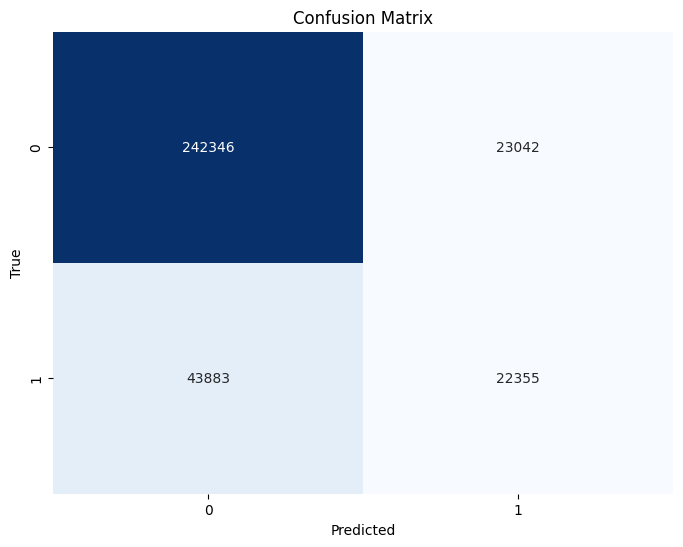

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Visualize the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Use the function with y_test and y_pred from the previous RandomForestClassifier example
plot_confusion_matrix(y_test, y_pred)

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc(y_true, y_pred_probs):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

    # Calculate the AUC
    auc = roc_auc_score(y_true, y_pred_probs)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line for random chance
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

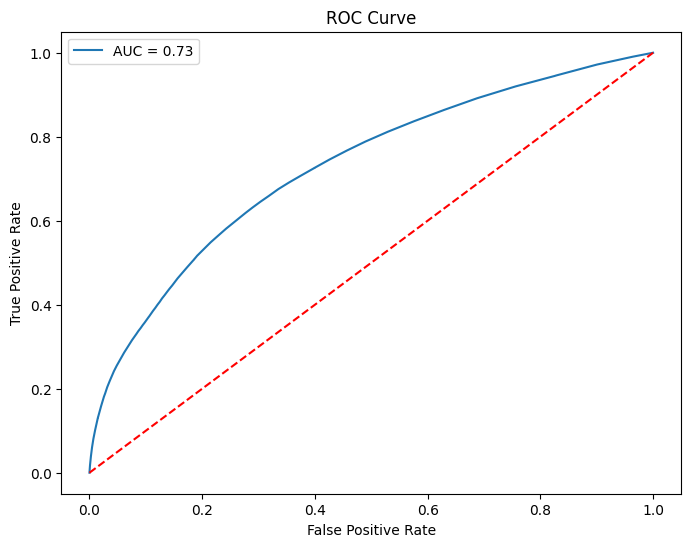

In [59]:
# Assuming classifier2 is a trained classifier, and X_test and y_test are already defined:

# Get the predicted probabilities of the positive class
y_pred_probs = classifier2.predict_proba(X_test)[:, 1]

# Now use the function with y_test and y_pred_probs
plot_roc(y_test, y_pred_probs)

In [ ]:
# Enter answer here and turn the cell type into markdown


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [ ]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("combined_csv_v2.csv")

In [5]:
df.columns

Index(['target', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfW

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658130 entries, 0 to 1658129
Data columns (total 86 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   target                1658130 non-null  int64  
 1   Distance              1658130 non-null  float64
 2   DepHourofDay          1658130 non-null  int64  
 3   AWND_O                1658130 non-null  int64  
 4   PRCP_O                1658130 non-null  int64  
 5   TAVG_O                1658130 non-null  float64
 6   AWND_D                1658130 non-null  int64  
 7   PRCP_D                1658130 non-null  int64  
 8   TAVG_D                1658130 non-null  float64
 9   SNOW_O                1658130 non-null  float64
 10  SNOW_D                1658130 non-null  float64
 11  Year_2015             1658130 non-null  int64  
 12  Year_2016             1658130 non-null  int64  
 13  Year_2017             1658130 non-null  int64  
 14  Year_2018             1658130 non-